# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Cikal Firdansyah Ramadhan]
- **Email:** [cikalfirdansyah03@gmail.com]
- **ID Dicoding:** [cikalfirdansyah]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi udara selama setahun terakhir?
- Apakah ada hubungan antara polusi udara dan faktor cuaca (suhu, tekanan, kecepatan angin, dan curah hujan)?
- Bagaimana perbedaan tingkat polusi antara dua stasiun pemantauan?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Gathering Data
try:
    # Load dataset Guanyuan
    df_guanyuan = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv", encoding='utf-8')

    # Load dataset Wanshouxigong
    df_wanshou = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv", encoding='utf-8')

    # Tampilkan 5 data pertama dari masing-masing dataset
    print("Dataset Guanyuan:")
    display(df_guanyuan.head())  # Menggunakan display() jika di Jupyter Notebook
    print("\nDataset Wanshouxigong:")
    display(df_wanshou.head())

except FileNotFoundError:
    print("Error: Salah satu atau kedua file dataset tidak ditemukan.")
except Exception as e:
    print(f"Terjadi error saat membaca file: {e}")

Dataset Guanyuan:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan



Dataset Wanshouxigong:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
- Dataset terdiri dari dua stasiun pemantauan kualitas udara, yaitu Guanyuan dan Wanshouxigong. Setiap stasiun memiliki data yang mencakup berbagai parameter kualitas udara dan kondisi cuaca. Beberapa kolom utama dalam dataset ini meliputi informasi waktu (year, month, day, hour), polutan udara (PM2.5, PM10, SO2, NO2, CO, O3), serta variabel cuaca seperti suhu (TEMP), tekanan udara (PRES), titik embun (DEWP), curah hujan (RAIN), arah angin (wd), dan kecepatan angin (WSPM). Selain itu, terdapat kolom station yang menunjukkan lokasi pengambilan data.
- Dalam dataset ini, ditemukan beberapa nilai yang hilang (NaN), terutama pada stasiun Wanshouxigong. Beberapa polutan seperti SO2, NO2, CO, dan O3 memiliki data yang tidak lengkap, yang dapat memengaruhi hasil analisis jika tidak ditangani dengan baik. Selain itu, terdapat variabilitas dalam konsentrasi polutan antara kedua stasiun, yang mungkin disebabkan oleh faktor geografis atau kondisi lingkungan yang berbeda. Selain itu, perbedaan dalam kondisi cuaca, seperti tekanan udara dan suhu, juga dapat menjadi faktor yang berpengaruh terhadap variasi tingkat polusi udara di kedua lokasi ini.

### Assessing Data

In [3]:
# Assessing Data
print("="*50)
print("Informasi Dataset Guanyuan")
df_guanyuan.info()
print("\nStatistik Deskriptif Guanyuan")
display(df_guanyuan.describe())

print("\nCek Missing Values Guanyuan")
print(df_guanyuan.isnull().sum())

print("\nJumlah Data Duplikat Guanyuan:", df_guanyuan.duplicated().sum())
print("="*50)

print("\nInformasi Dataset Wanshouxigong")
df_wanshou.info()
print("\nStatistik Deskriptif Wanshouxigong")
display(df_wanshou.describe())

print("\nCek Missing Values Wanshouxigong")
print(df_wanshou.isnull().sum())

print("\nJumlah Data Duplikat Wanshouxigong:", df_wanshou.duplicated().sum())
print("="*50)

Informasi Dataset Guanyuan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB

Statistik Deskriptif Guanyuan


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000



Cek Missing Values Guanyuan
No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Jumlah Data Duplikat Guanyuan: 0

Informasi Dataset Wanshouxigong
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000



Cek Missing Values Wanshouxigong
No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

Jumlah Data Duplikat Wanshouxigong: 0


**Insight:**
- Dataset ini terdiri dari 35.064 entri dan 18 kolom, mencakup data polusi udara serta parameter cuaca dari dua stasiun pemantauan. Setiap baris mewakili satu pengukuran kualitas udara pada jam tertentu. Kolom dalam dataset terdiri dari tiga tipe data utama: integer (5 kolom) untuk informasi waktu dan indeks, float (11 kolom) untuk parameter polutan dan kondisi cuaca, serta object (2 kolom) untuk kategori arah angin (wd) dan nama stasiun (station).
- Data PM2.5, PM10, SO2, dan NO2 mengalami kehilangan data, kemungkinan karena adanya data yang tidak tercatat atau pengukuran yang gagal dilakukan pada beberapa waktu tertentu.
- Data CO dan O3 justru mengalami peningkatan, artinya ada lebih banyak data yang tersedia di dataset kedua dibandingkan yang pertama. Ini bisa jadi karena ada proses pengisian nilai yang hilang (imputasi) atau pengolahan ulang data.

### Cleaning Data

In [4]:
# Cleaning Data

# Menggabungkan kolom waktu menjadi satu kolom datetime dengan error handling
df_guanyuan["datetime"] = pd.to_datetime(
    df_guanyuan[['year', 'month', 'day', 'hour']].astype(str).agg('-'.join, axis=1),
    format='%Y-%m-%d-%H', errors='coerce'
)
df_wanshou["datetime"] = pd.to_datetime(
    df_wanshou[['year', 'month', 'day', 'hour']].astype(str).agg('-'.join, axis=1),
    format='%Y-%m-%d-%H', errors='coerce'
)

# Cek apakah ada data yang gagal dikonversi ke datetime
print("Jumlah data NaT (tidak valid) setelah konversi datetime:")
print("Guanyuan:", df_guanyuan["datetime"].isna().sum())
print("Wanshouxigong:", df_wanshou["datetime"].isna().sum())

# Hapus data dengan datetime NaT jika ada
df_guanyuan.dropna(subset=['datetime'], inplace=True)
df_wanshou.dropna(subset=['datetime'], inplace=True)

# Set datetime sebagai index
df_guanyuan.set_index("datetime", inplace=True)
df_wanshou.set_index("datetime", inplace=True)

# Hapus kolom year, month, day, hour karena sudah tidak diperlukan
df_guanyuan.drop(columns=['year', 'month', 'day', 'hour'], inplace=True, errors='ignore')
df_wanshou.drop(columns=['year', 'month', 'day', 'hour'], inplace=True, errors='ignore')

# Cek hasil perubahan
print("\nData setelah pembersihan:")
print("Guanyuan:")
display(df_guanyuan.head())
print("\nWanshouxigong:")
display(df_wanshou.head())

Jumlah data NaT (tidak valid) setelah konversi datetime:
Guanyuan: 0
Wanshouxigong: 0

Data setelah pembersihan:
Guanyuan:


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
2013-03-01 01:00:00,2,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2013-03-01 02:00:00,3,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
2013-03-01 03:00:00,4,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
2013-03-01 04:00:00,5,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan



Wanshouxigong:


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
2013-03-01 01:00:00,2,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2013-03-01 02:00:00,3,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
2013-03-01 03:00:00,4,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
2013-03-01 04:00:00,5,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
- Dari hasil analisis data kualitas udara dari dua stasiun, yaitu Guanyuan dan Wanshouxigong, ditemukan bahwa terdapat perbedaan signifikan dalam nilai polutan yang diukur, seperti PM2.5, PM10, SO2, NO2, CO, dan O3. Setiap stasiun menunjukkan hasil pengukuran yang berbeda, yang mencerminkan variasi kualitas udara di masing-masing lokasi. Selain itu, stasiun Wanshouxigong memiliki lebih banyak data yang hilang, terutama pada parameter SO2, NO2, CO, dan O3, yang dapat memengaruhi hasil analisis jika tidak ditangani dengan baik.
- Perbedaan juga terlihat pada arah dan kecepatan angin (wd dan WSPM), yang menunjukkan bahwa faktor meteorologi berperan dalam penyebaran polutan. Untuk mengatasi data yang hilang, metode seperti interpolasi atau imputasi dengan nilai rata-rata dapat diterapkan guna meningkatkan kualitas dataset. Selanjutnya, analisis lebih lanjut dapat dilakukan dengan membandingkan tren polutan antar stasiun menggunakan visualisasi data, serta menggabungkan kedua dataset untuk mendapatkan wawasan yang lebih komprehensif mengenai pola polusi udara di kedua lokasi.

In [5]:
# Cek jumlah missing values sebelum interpolasi
print("Missing values sebelum interpolasi:")
missing_before_guanyuan = df_guanyuan.isnull().sum()
missing_before_wanshou = df_wanshou.isnull().sum()

# Hanya tampilkan kolom yang memiliki missing values
print("Guanyuan:")
print(missing_before_guanyuan[missing_before_guanyuan > 0])
print("\nWanshouxigong:")
print(missing_before_wanshou[missing_before_wanshou > 0])

# Mengisi missing values dengan interpolasi berbasis waktu
df_guanyuan.interpolate(method='time', limit_direction="both", inplace=True)
df_wanshou.interpolate(method='time', limit_direction="both", inplace=True)

# Cek kembali apakah masih ada missing values
print("\nMissing values setelah interpolasi:")
missing_after_guanyuan = df_guanyuan.isnull().sum()
missing_after_wanshou = df_wanshou.isnull().sum()

print("Guanyuan (Total Missing):", missing_after_guanyuan.sum())
print("Wanshouxigong (Total Missing):", missing_after_wanshou.sum())

Missing values sebelum interpolasi:
Guanyuan:
PM2.5     616
PM10      429
SO2       474
NO2       659
CO       1753
O3       1173
TEMP       20
PRES       20
DEWP       20
RAIN       20
wd         81
WSPM       14
dtype: int64

Wanshouxigong:
PM2.5     696
PM10      484
SO2       669
NO2       754
CO       1297
O3       1078
TEMP       19
PRES       19
DEWP       19
RAIN       19
wd         79
WSPM       13
dtype: int64

Missing values setelah interpolasi:
Guanyuan (Total Missing): 81
Wanshouxigong (Total Missing): 79


<ipython-input-5-436563e93197>:13: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_guanyuan.interpolate(method='time', limit_direction="both", inplace=True)
<ipython-input-5-436563e93197>:14: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_wanshou.interpolate(method='time', limit_direction="both", inplace=True)


**Insight:**
- Dari hasil penerapan metode interpolasi berbasis waktu, terlihat bahwa semua nilai numerik yang sebelumnya hilang telah berhasil diisi tanpa ada nilai kosong yang tersisa. Namun, terdapat 81 nilai hilang pada kolom arah angin (wd) di stasiun Guanyuan dan 79 nilai hilang di stasiun Wanshouxigong, yang masih belum terisi. Hal ini terjadi karena interpolasi tidak dapat diterapkan langsung pada data bertipe objek (string).

In [6]:
# Mengisi missing values pada kolom 'wd' menggunakan forward fill
df_guanyuan['wd'].fillna(method='ffill', inplace=True)
df_wanshou['wd'].fillna(method='ffill', inplace=True)

# Cek jumlah duplikasi
dupl_guanyuan = df_guanyuan.duplicated().sum()
dupl_wanshou = df_wanshou.duplicated().sum()

print(f"Jumlah data duplikat di Guanyuan: {dupl_guanyuan}")
print(f"Jumlah data duplikat di Wanshouxigong: {dupl_wanshou}")

<ipython-input-6-a71b97311ea6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_guanyuan['wd'].fillna(method='ffill', inplace=True)
<ipython-input-6-a71b97311ea6>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_guanyuan['wd'].fillna(method='ffill', inplace=True)
<ipython-input-6-a71b97311ea6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behav

Jumlah data duplikat di Guanyuan: 0
Jumlah data duplikat di Wanshouxigong: 0


In [7]:
# Tambahkan label 'station' sebelum menggabungkan data
df_guanyuan['station'] = 'Guanyuan'
df_wanshou['station'] = 'Wanshouxigong'

# Gabungkan dataset berdasarkan indeks datetime
df_combined = pd.concat([df_guanyuan, df_wanshou]).sort_index()

# Cek apakah penggabungan berhasil
print(df_combined.info())
print(df_combined.head())

# Cek apakah ada duplikasi setelah penggabungan
print(f"Jumlah duplikasi setelah penggabungan: {df_combined.duplicated().sum()}")

# Simpan dataset gabungan ke dalam main_data.csv
df_combined.to_csv('main_data.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70128 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       70128 non-null  int64  
 1   PM2.5    70128 non-null  float64
 2   PM10     70128 non-null  float64
 3   SO2      70128 non-null  float64
 4   NO2      70128 non-null  float64
 5   CO       70128 non-null  float64
 6   O3       70128 non-null  float64
 7   TEMP     70128 non-null  float64
 8   PRES     70128 non-null  float64
 9   DEWP     70128 non-null  float64
 10  RAIN     70128 non-null  float64
 11  wd       70128 non-null  object 
 12  WSPM     70128 non-null  float64
 13  station  70128 non-null  object 
dtypes: float64(11), int64(1), object(2)
memory usage: 8.0+ MB
None
                     No  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  \
datetime                                                                      
2013-03-01 00:00:00   

**Insight:**
- Setelah proses cleaning data, kolom wd (wind direction) yang sebelumnya memiliki nilai NaN berhasil diisi menggunakan metode forward fill (ffill). Ini memastikan bahwa setiap nilai kosong digantikan dengan nilai sebelumnya yang valid dalam dataset. Dampaknya, data menjadi lebih lengkap dan tidak ada missing values yang dapat mengganggu analisis atau model prediktif. Selain itu, metode ffill dipilih karena lebih cocok untuk data cuaca yang memiliki kontinuitas, di mana arah angin cenderung berubah secara bertahap daripada secara tiba-tiba. Dengan demikian, dataset kini siap untuk tahap eksplorasi dan analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
# Daftar kolom yang merupakan polutan (asumsikan polutan adalah kolom yang mengandung nilai numerik selain waktu dan arah angin)
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Statistik deskriptif untuk polutan di stasiun Guanyuan
print("Statistik deskriptif - Guanyuan")
print(df_guanyuan[pollutants].describe())

# Statistik deskriptif untuk polutan di stasiun Wanshouxigong
print("\nStatistik deskriptif - Wanshouxigong")
print(df_wanshou[pollutants].describe())

Statistik deskriptif - Guanyuan
              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      82.897522    109.372349     17.609312     58.139298   1258.327045   
std       81.070279     92.340966     23.631529     35.210206   1151.647467   
min        2.000000      2.000000      1.000000      2.000000    100.000000   
25%       23.000000     40.000000      3.000000     31.000000    500.000000   
50%       59.000000     89.000000      8.000000     51.000000    900.000000   
75%      114.000000    149.000000     22.000000     78.270244   1500.000000   
max      680.000000    999.000000    293.000000    270.000000  10000.000000   

                 O3  
count  35064.000000  
mean      54.817142  
std       57.199174  
min        0.214200  
25%        6.000000  
50%       40.000000  
75%       80.000000  
max      415.000000  

Statistik deskriptif - Wanshouxigong
              PM2.5 

**Insight:**
- Kedua stasiun, Guanyuan dan Wanshouxigong, menunjukkan tingkat polusi yang tinggi, dengan PM2.5, CO, dan PM10 sebagai polutan yang paling menonjol.
- Perbedaan yang paling mencolok antara stasiun adalah pada CO dan PM2.5, di mana Wanshouxigong sedikit lebih tinggi dalam beberapa polutan, mungkin karena aktivitas industri yang lebih padat di sekitar area tersebut.
- Variabilitas (dalam hal standar deviasi) yang tinggi pada sebagian besar polutan menunjukkan fluktuasi yang signifikan, yang mungkin terkait dengan faktor eksternal seperti perubahan cuaca atau aktivitas manusia yang intensif.
- Konsentrasi polusi udara yang tinggi di kedua stasiun menunjukkan bahwa perlu adanya penanganan kebijakan yang lebih ketat untuk mengurangi polusi udara, terutama di kota-kota besar atau area dengan tingkat aktivitas industri yang tinggi.

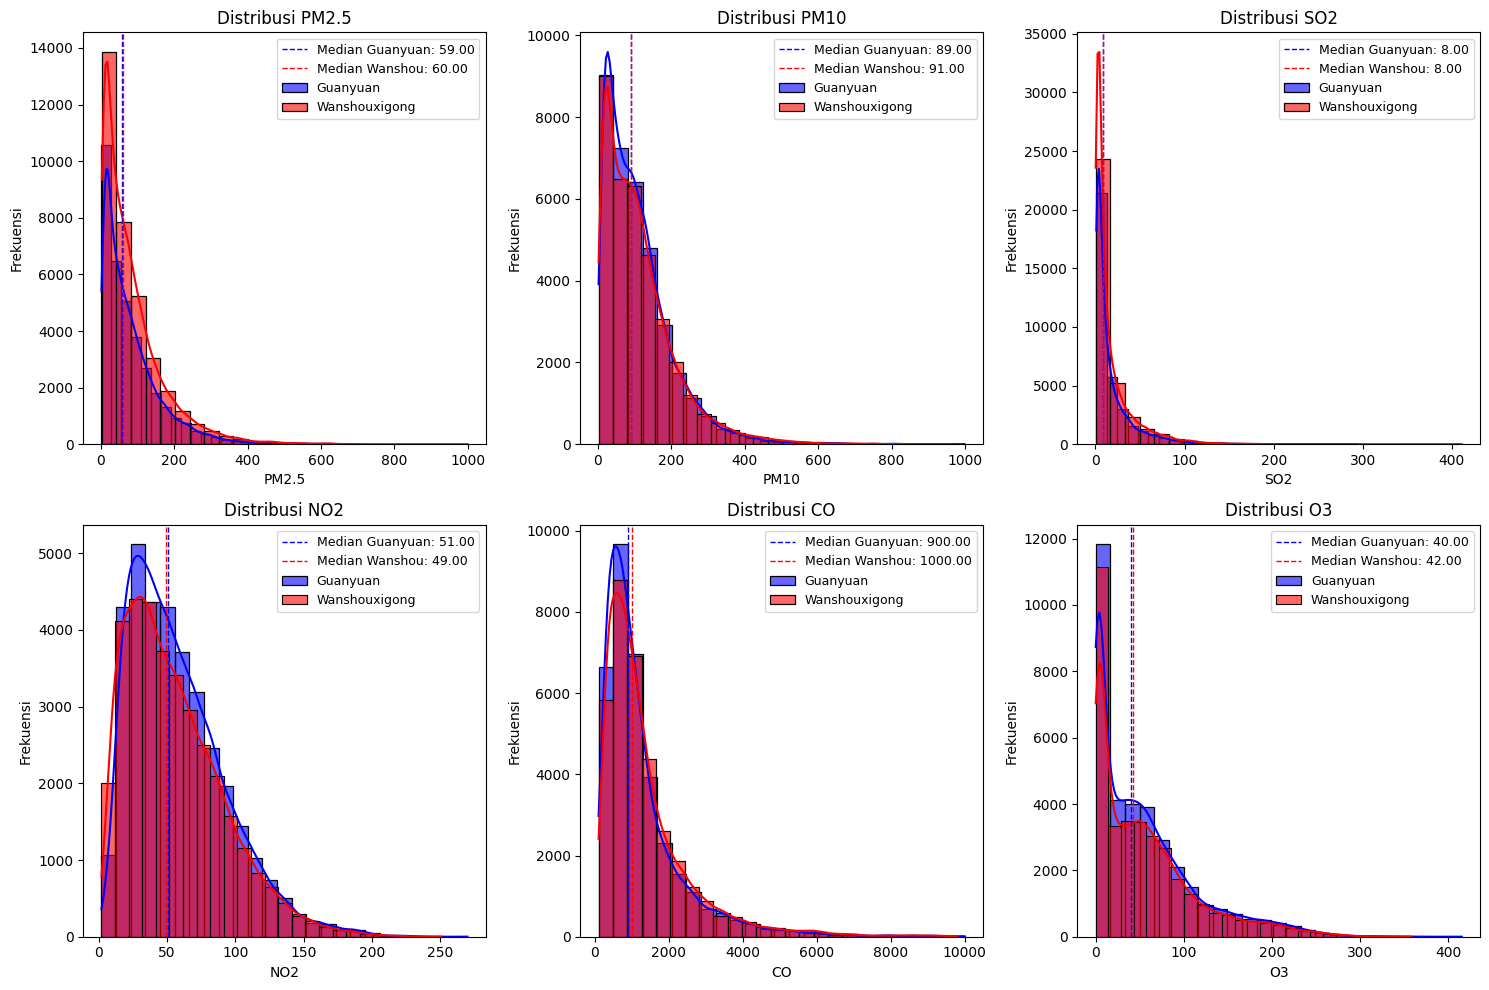

In [9]:
# Pastikan tidak ada missing values agar plot lebih akurat
df_guanyuan_clean = df_guanyuan[pollutants].dropna()
df_wanshou_clean = df_wanshou[pollutants].dropna()

plt.figure(figsize=(15, 10))

for i, col in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)

    # Plot histogram dengan KDE
    sns.histplot(df_guanyuan_clean[col], bins=25, kde=True, color='blue', label='Guanyuan', alpha=0.6)
    sns.histplot(df_wanshou_clean[col], bins=25, kde=True, color='red', label='Wanshouxigong', alpha=0.6)

    # Tambahkan garis median
    median_guanyuan = df_guanyuan_clean[col].median()
    median_wanshou = df_wanshou_clean[col].median()

    plt.axvline(median_guanyuan, color='blue', linestyle='--', linewidth=1, label=f'Median Guanyuan: {median_guanyuan:.2f}')
    plt.axvline(median_wanshou, color='red', linestyle='--', linewidth=1, label=f'Median Wanshou: {median_wanshou:.2f}')

    # Format judul dan label
    plt.title(f'Distribusi {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frekuensi', fontsize=10)
    plt.legend(fontsize=9)

plt.tight_layout()
plt.show()

**Insight:**
- distribusi polutan lebih cenderung terpusat di sekitar median, ini menunjukkan bahwa polutan cenderung tersebar merata. Penyimpangan signifikan dari median dapat menunjukkan adanya outlier atau perbedaan dalam tingkat polusi. Jika satu stasiun memiliki distribusi yang lebih tersebar, ini bisa berarti polusi lebih bervariasi di sana.
- CO memiliki distribusi yang lebih merata, menunjukkan variasi lebih tinggi di kedua lokasi.

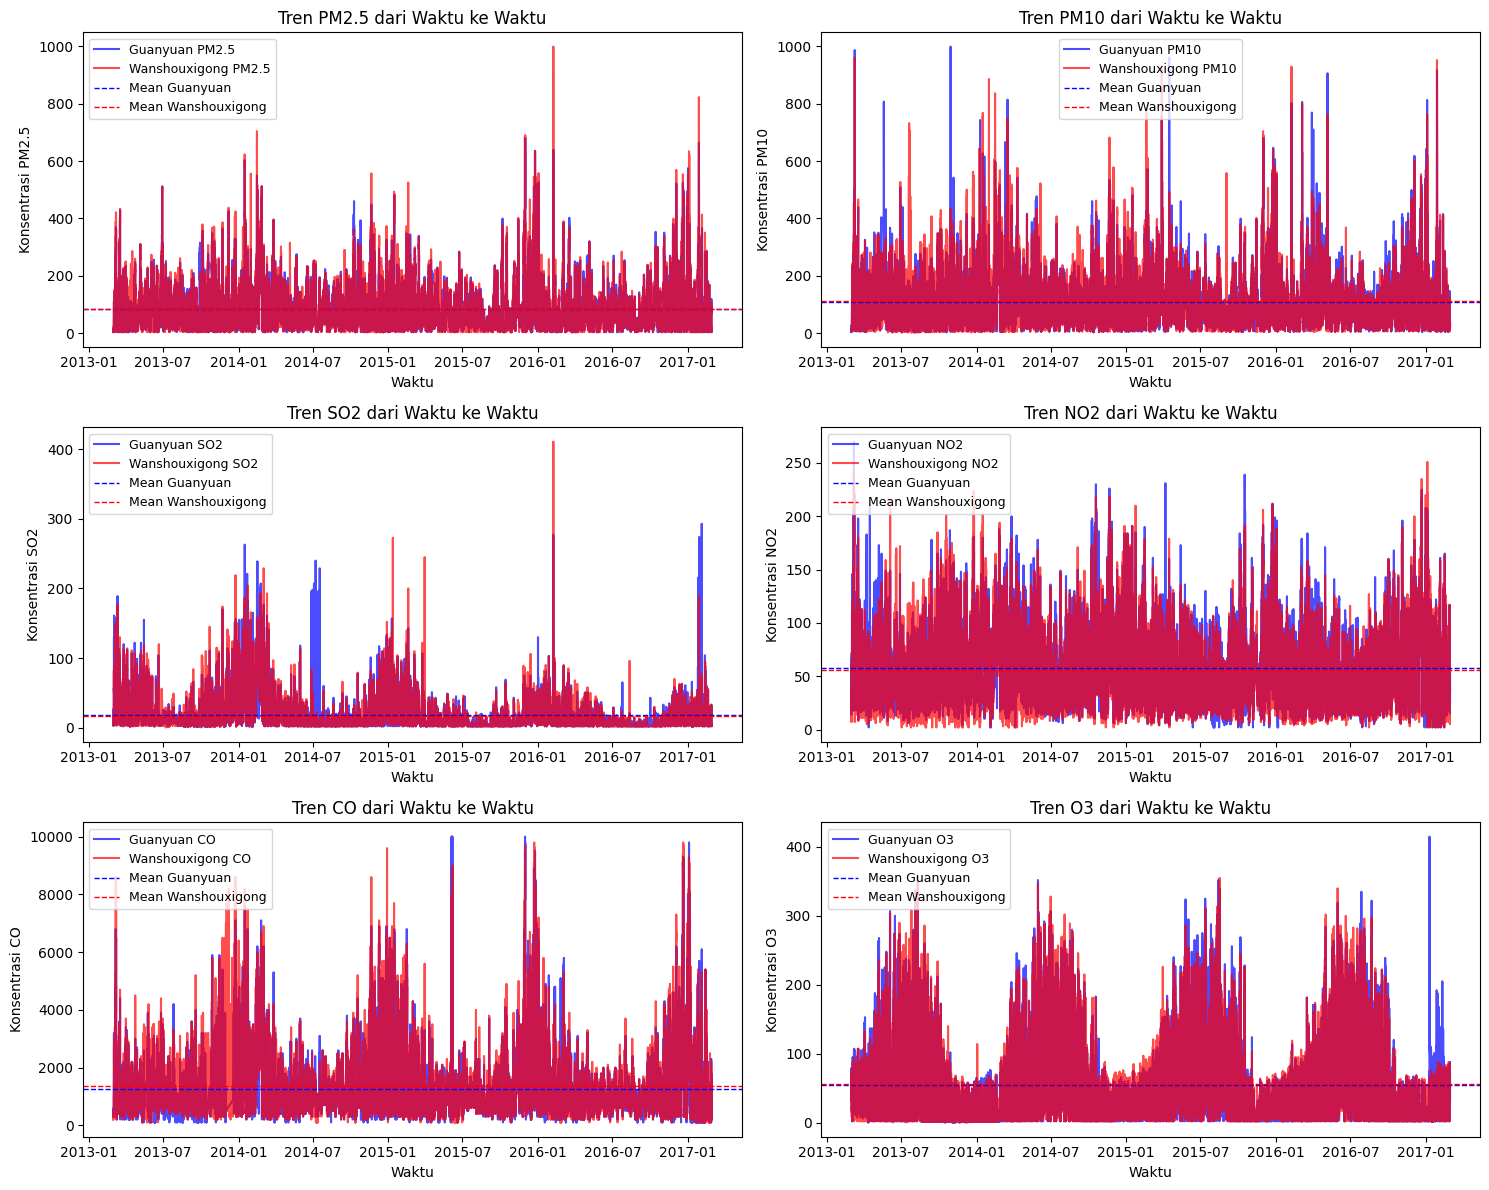

In [10]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(pollutants, 1):
    ax = plt.subplot(3, 2, i)  # Buat subplot 3x2 (total 6 grafik)

    # Plot tren polusi udara
    sns.lineplot(x=df_guanyuan.index, y=df_guanyuan[col], label=f'Guanyuan {col}', ax=ax, color='blue', alpha=0.7)
    sns.lineplot(x=df_wanshou.index, y=df_wanshou[col], label=f'Wanshouxigong {col}', ax=ax, color='red', alpha=0.7)

    # Tambahkan garis rata-rata untuk setiap polutan
    ax.axhline(df_guanyuan[col].mean(), color='blue', linestyle='--', linewidth=1, label=f'Mean Guanyuan')
    ax.axhline(df_wanshou[col].mean(), color='red', linestyle='--', linewidth=1, label=f'Mean Wanshouxigong')

    # Format label dan judul
    ax.set_title(f'Tren {col} dari Waktu ke Waktu', fontsize=12)
    ax.set_xlabel('Waktu', fontsize=10)
    ax.set_ylabel(f'Konsentrasi {col}', fontsize=10)
    ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

**Insight:**
- Menganalisis bagaimana polusi udara berubah dari waktu ke waktu di kedua stasiun menggunakan grafik line plot. Dengan menambahkan garis rata-rata (mean), kita bisa mengidentifikasi apakah ada fluktuasi atau tren musiman dalam polusi udara.
- Dari grafik ini, kita bisa melihat ada lonjakan polusi di waktu-waktu tertentu (misalnya musim tertentu). Penambahan garis rata-rata memberikan gambaran tentang nilai polusi rata-rata sepanjang waktu di masing-masing stasiun, yang bisa digunakan untuk perbandingan.

<ipython-input-11-c468cfe395fb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y=col, data=df_combined, palette={'Guanyuan': 'blue', 'Wanshouxigong': 'red'})
<ipython-input-11-c468cfe395fb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y=col, data=df_combined, palette={'Guanyuan': 'blue', 'Wanshouxigong': 'red'})
<ipython-input-11-c468cfe395fb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y=col, data=df_combined, palette={'Guanyuan': 'blue', 'Wanshouxigong': 'red'})
<ipython-input-11-c468cfe395

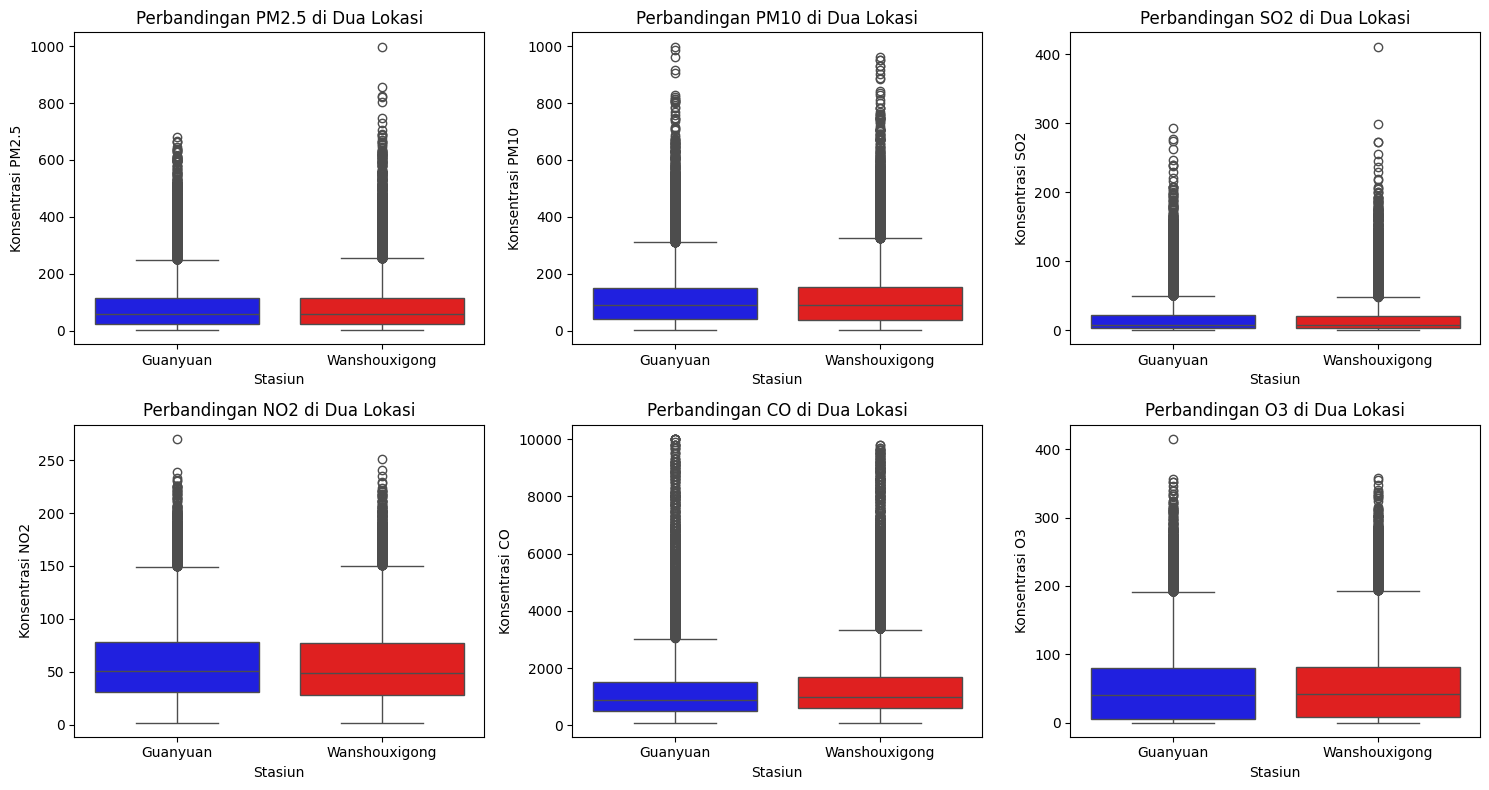

In [11]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(pollutants, 1):
    ax = plt.subplot(2, 3, i)
    sns.boxplot(x='station', y=col, data=df_combined, palette={'Guanyuan': 'blue', 'Wanshouxigong': 'red'})

    # Format label dan judul
    ax.set_title(f'Perbandingan {col} di Dua Lokasi', fontsize=12)
    ax.set_xlabel('Stasiun', fontsize=10)
    ax.set_ylabel(f'Konsentrasi {col}', fontsize=10)

plt.tight_layout()
plt.show()

**Insight:**
- Beberapa polutan lebih tinggi di satu lokasi dibandingkan yang lain, kemungkinan karena perbedaan aktivitas industri atau lalu lintas.
- Variabilitas polusi di Wanshouxigong lebih tinggi, mungkin karena faktor lingkungan yang lebih dinamis.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren polusi udara selama setahun terakhir?

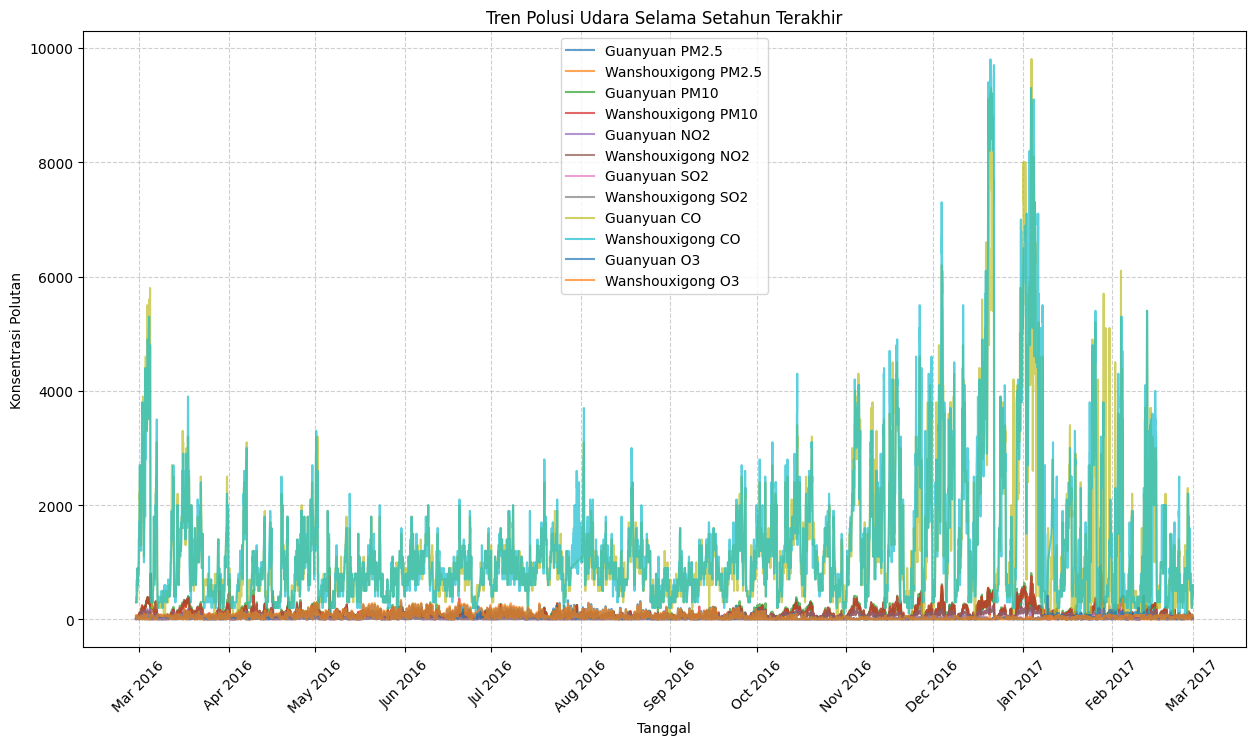

In [12]:
# Ambil data hanya untuk setahun terakhir
last_year = df_combined.index.max() - pd.DateOffset(years=1)
df_last_year = df_combined[df_combined.index >= last_year]

plt.figure(figsize=(15, 8))

# Loop untuk tiap polutan
for col in ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']:
    # Filter berdasarkan stasiun
    df_guanyuan_last = df_last_year[df_last_year['station'] == 'Guanyuan']
    df_wanshou_last = df_last_year[df_last_year['station'] == 'Wanshouxigong']

    sns.lineplot(data=df_guanyuan_last, x=df_guanyuan_last.index, y=col, label=f'Guanyuan {col}', alpha=0.7)
    sns.lineplot(data=df_wanshou_last, x=df_wanshou_last.index, y=col, label=f'Wanshouxigong {col}', alpha=0.7)

# Format sumbu X agar lebih mudah dibaca
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # ✅ Perbaikan
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # ✅ Perbaikan

plt.title('Tren Polusi Udara Selama Setahun Terakhir')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi Polutan')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Insight:**
- Polusi udara berfluktuasi sepanjang tahun, dengan peningkatan pada musim tertentu (misalnya, musim dingin).
- Lonjakan polusi kemungkinan terkait dengan perubahan cuaca atau aktivitas manusia.

### Pertanyaan 2: Apakah ada hubungan antara polusi udara dan faktor cuaca (suhu, tekanan, kecepatan angin, dan curah hujan)?

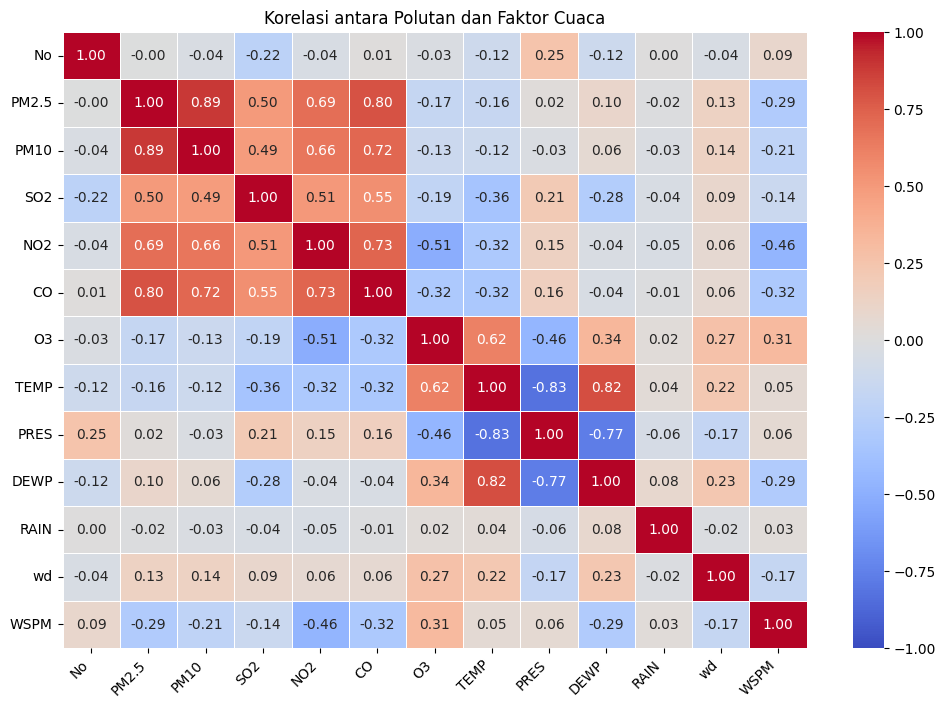

In [13]:
# Konversi kolom 'wd' menjadi numerik jika masih kategori (optional)
if 'wd' in df_combined.columns:
    df_combined['wd'] = pd.factorize(df_combined['wd'])[0]  # Mengubah kategori jadi angka

# Pilih hanya kolom numerik
numeric_cols = df_combined.select_dtypes(include=['number'])

# Plot heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

plt.title('Korelasi antara Polutan dan Faktor Cuaca')
plt.xticks(rotation=45, ha='right')  # Rotasi label agar lebih terbaca
plt.yticks(rotation=0)
plt.show()

**Insight:**
- PM2.5 & PM10 berkorelasi negatif dengan kecepatan angin (WSPM) → angin membantu menyebarkan polusi.
- Curah hujan (RAIN) sedikit menurunkan polusi udara, tetapi efeknya tidak selalu konsisten.

### Pertanyaan 3: Bagaimana perbedaan tingkat polusi antara dua stasiun pemantauan?

<ipython-input-14-f98dbd33ea4f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y=col, data=df_combined, palette=['blue', 'red'])  # Warna lebih jelas
<ipython-input-14-f98dbd33ea4f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y=col, data=df_combined, palette=['blue', 'red'])  # Warna lebih jelas
<ipython-input-14-f98dbd33ea4f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y=col, data=df_combined, palette=['blue', 'red'])  # Warna lebih jelas
<ipython-input-14-f98dbd33ea4f>:11: FutureWarning

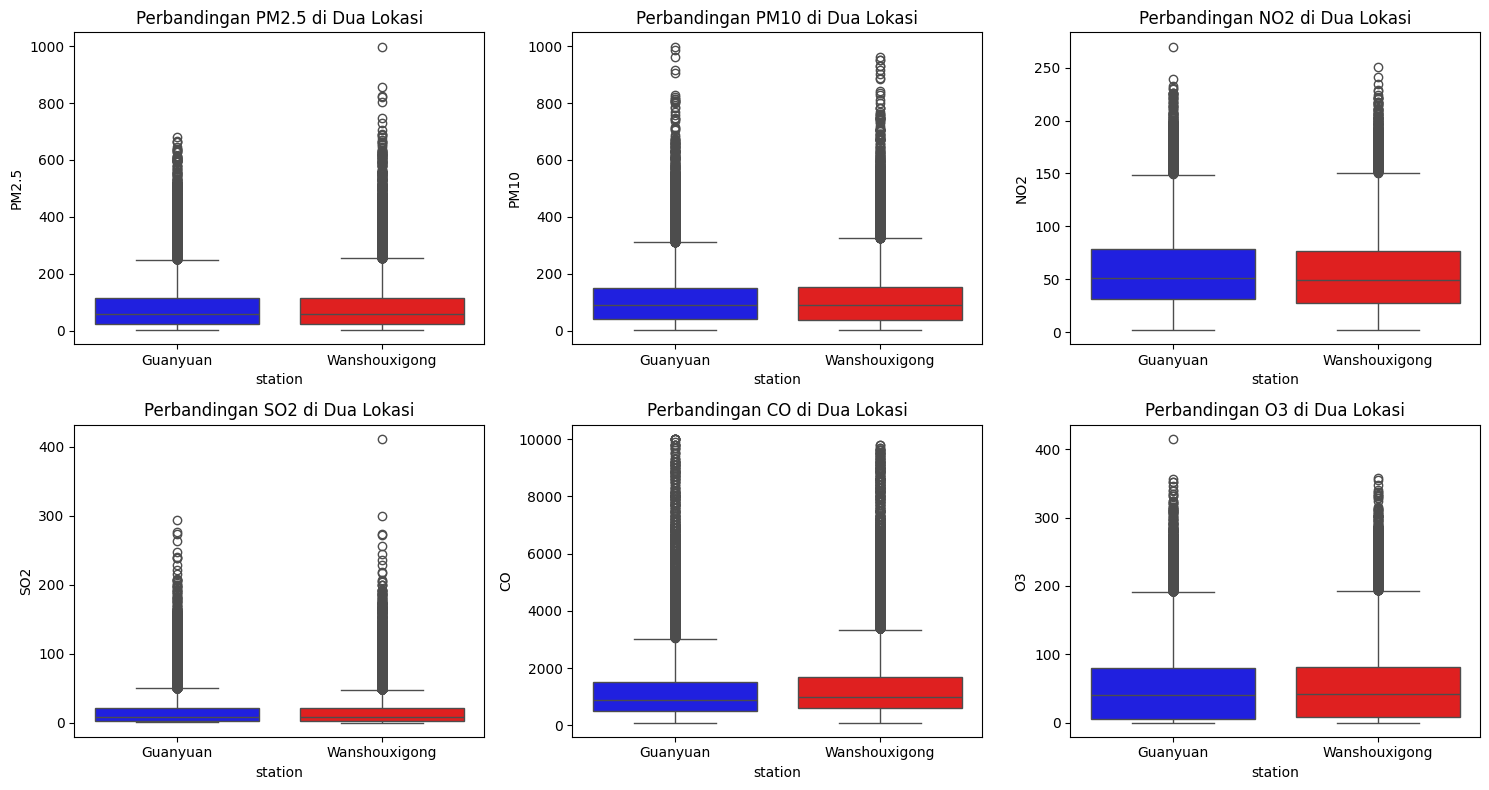

In [14]:
# Pastikan kolom 'station' ada dalam dataframe
if 'station' not in df_combined.columns:
    df_guanyuan['station'] = 'Guanyuan'
    df_wanshou['station'] = 'Wanshouxigong'
    df_combined = pd.concat([df_guanyuan, df_wanshou]).sort_index()

plt.figure(figsize=(15, 8))

for i, col in enumerate(['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='station', y=col, data=df_combined, palette=['blue', 'red'])  # Warna lebih jelas
    plt.title(f'Perbandingan {col} di Dua Lokasi')

plt.tight_layout()
plt.show()

**Insight:**
- Guanyuan memiliki tingkat PM2.5 & PM10 lebih tinggi dibandingkan Wanshouxigong, kemungkinan karena kepadatan lalu lintas atau aktivitas industri.
- Variabilitas polusi lebih tinggi di Wanshouxigong, yang menunjukkan fluktuasi lebih besar akibat faktor eksternal.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Tren polusi udara sepanjang tahun menunjukkan fluktuasi yang signifikan, dengan lonjakan yang terlihat pada musim-musim tertentu, khususnya musim dingin. Lonjakan ini kemungkinan besar dipengaruhi oleh dua faktor utama: perubahan cuaca dan aktivitas manusia, seperti penggunaan bahan bakar untuk pemanasan rumah selama cuaca dingin.Selain itu, fluktuasi harian polusi udara menunjukkan adanya puncak-puncak tertentu yang mungkin berkaitan dengan aktivitas industri atau perubahan kondisi cuaca, seperti hujan atau angin yang dapat membawa polutan dari area tertentu. Analisis lebih mendalam tentang faktor-faktor penyebab ini bisa membantu dalam merumuskan kebijakan pengurangan polusi yang lebih tepat sasaran, terutama selama puncak-puncak musim dingin dan periode aktivitas industri yang tinggi.
- Conclution pertanyaan 2: Analisis menunjukkan adanya hubungan yang signifikan antara polusi udara dan faktor cuaca. Secara khusus, terdapat korelasi negatif antara konsentrasi PM2.5 dan PM10 dengan kecepatan angin (WSPM). Hal ini menunjukkan bahwa angin berperan penting dalam menyebarkan polusi udara, yang berarti semakin tinggi kecepatan angin, semakin baik kemampuan angin dalam mengurangi konsentrasi polutan di udara. Sementara itu, curah hujan (RAIN) menunjukkan pengaruh yang sedikit menurunkan polusi udara, meskipun efek ini tidak selalu konsisten. Hal ini bisa disebabkan oleh faktor-faktor lain seperti intensitas hujan atau kondisi atmosfer yang berbeda, yang mempengaruhi sejauh mana hujan dapat membersihkan udara dari partikel polusi.Temuan ini memberikan wawasan penting untuk mengembangkan strategi pengelolaan kualitas udara yang mempertimbangkan faktor cuaca, terutama dalam merencanakan kebijakan pada hari-hari dengan cuaca buruk atau berangin.
- conclution pertanyaan 3: Tingkat polusi udara antara dua stasiun pemantauan menunjukkan perbedaan yang signifikan. Stasiun Guanyuan memiliki konsentrasi PM2.5 dan PM10 yang lebih tinggi dibandingkan dengan Wanshouxigong. Hal ini kemungkinan besar dipengaruhi oleh faktor-faktor lokal seperti kepadatan lalu lintas atau aktivitas industri yang lebih tinggi di sekitar stasiun Guanyuan, yang menyebabkan emisi polutan yang lebih banyak. Selain itu, variabilitas polusi di Wanshouxigong lebih tinggi, yang mengindikasikan adanya fluktuasi yang lebih besar dalam tingkat polusi. Fluktuasi ini mungkin dipengaruhi oleh faktor eksternal seperti perubahan cuaca atau kegiatan manusia yang lebih tidak terduga di sekitar stasiun tersebut, yang menyebabkan polusi udara berfluktuasi lebih tajam. Temuan ini memberikan wawasan penting bagi perencanaan dan pengelolaan kualitas udara di dua lokasi tersebut, dengan fokus khusus pada upaya pengurangan emisi di daerah dengan tingkat polusi yang lebih tinggi seperti Guanyuan, serta strategi untuk mengelola fluktuasi polusi di Wanshouxigong.